<a href="https://colab.research.google.com/github/LiamAMcNamara/NNs-Lab4/blob/Part1/McNamara_Lab_4_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSE 5522 Lab #4: Neural Networks**

The goals of this lab are to familarize you with:

* Perceptron Learning Rule
* Neural Network toolkits (PyTorch, specifically)
* Supervised learning with data related to speech

**Initial notes**

* (If you are using Google Colab) Make a copy of this page in your google drive so that you can edit it.

* While not completely necessary for this assignment, you may want to familiarize yourself with the following packages: [numpy](https://numpy.org), [scikit-learn](https://scikit-learn.org), [pandas](https://pandas.pydata.org), [matplotlib](https://matplotlib.org).
 * Especially numpy, many of the calculations in this (and later) lab can be done in one line using numpy. Whereas raw python may require 5-10x that.

* Feel free to (please do!) change the structure of the document below. Especially, add code sections to break your code into logical pieces and add text sections to explain your code or results

---
---



# **Part 1: Perceptron Learning Rule (20 pts)**

The perceptron learning rule is a simple method for training a linear classifier.

The basic idea is: when you classify something incorrectly, move the linear classifier a bit in a way that updates the boundary line.  This is related to the gradient descent algorithm used for linear regression.

In the first part of the exercise, you'll code the Perceptron Learning Rule (PLR) algorithm. Then you will learn the "and" function to show the basic operation of the PLR, and in the second you'll try to classify some vowels.

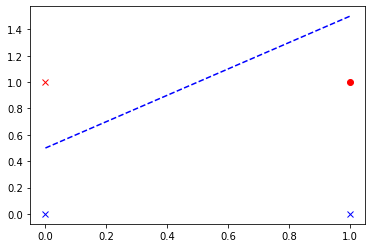

In [7]:
# set up some preliminaries

import numpy as np
import matplotlib.pyplot as plt

# set classification data for "and"
data=np.array([[0,0],[0,1],[1,0],[1,1]])
targets=np.array([0,0,0,1])
bias=-1

# set some initial weights : w1, w2, bias
weights_init=np.array([-1,1,0.5])

# here is a function for plotting both the dataset and the current decision
# boundary, with errors in red
def plotgraph(data,targets,weights):
  classification=(np.sign(np.dot(np.hstack((data,np.ones((data.shape[0],1))*bias)),weights))+1)/2

  plt.plot(data[np.logical_and(targets==1,classification==1),0],
           data[np.logical_and(targets==1,classification==1),1],'bo')
  plt.plot(data[np.logical_and(targets==1,classification==0),0],
           data[np.logical_and(targets==1,classification==0),1],'ro')
  plt.plot(data[np.logical_and(targets==0,classification==1),0],
           data[np.logical_and(targets==0,classification==1),1],'rx')
  plt.plot(data[np.logical_and(targets==0,classification==0),0],
           data[np.logical_and(targets==0,classification==0),1],'bx')

  # note weights are in form w_1*x + w_2*y + w_b = 0
  # so to plot line we need y= -(w_1*x + w_b)/(w_2)
  dmin=np.min(data[:,0])
  dmax=np.max(data[:,0])
  plt.plot(np.array([dmin,dmax]),
           np.array([-(dmin*weights[0]+weights[2]*bias)/(weights[1]),
                     -(dmax*weights[0]+weights[2]*bias)/(weights[1])]),
           'b--'
           )


#Plot the current situation.  Red items are misclassified, blue
#correctly classified. x=0, circle=1.
plotgraph(data,targets,weights_init)


**1.1** This is where you will need to code the perceptron learning algorithm.

You should assume that the nonlinear function is a step function that outputs 1 if the input is greater than 0, and 0 otherwise.

Remember that there should be a bias (i.e., there should be one more weight than there are inputs).  You can choose to define the fixed bias as -1 (as traditionally done) or 1.  Note if you change the bias you may need to pay attention to the plotting function above.

The function should return the updated weight vector.

(Hint: You may wish to define a separate function which calculates the output of the perceptron given some set of weights.)

In [138]:
def plr(weights,example,target,learningrate):
  # compute weight update
  # return updated weights
  print(f'weights:{weights}')
  print(f'example:{example}')
  print(f'target:{target}')
  # print(f'learningrate:{learningrate}')

  upd_weights = np.zeros_like(weights)
  o = output(weights, example)
  print(f'output:{o}')
  err = target-o
  upd_weights[0] = weights[0] + learningrate*err*bias
  upd_weights[1] = weights[1] + learningrate*err*example[0]
  upd_weights[2] = weights[2] + learningrate*err*example[1]
  # for i in range(1, len(weights)-1):
  #   ox = g(weights[i]*example[i])
  #   err = target[i] - ox
  #   upd_weights[i] = weights[i]+learningrate*err*example[i]
  #   print(f'upd_weights[{i}]:{upd_weights[i]}')
  return upd_weights


In [154]:
def output(w, x):
  print('\n --IN OUTPUT FUNCT--\n')
  print(f'\tweights:{w}')
  print(f'\texample:{x}')
  
  retval = 0
  o = w[0]*bias #+ w[1]*x[0] + w[2]*x[1]
  if x[0] == 1:
    o += w[1]
  if x[1] == 1:
    o += w[2]
  
  print(f'\to:{o}')
  if o > 0.0:
    retval = 1
  if o == 0.0:
    retval = 0
  print(f'\t returning:{retval}')
  return retval

**1.2** The following function will randomize your training examples, and run 

the PLR for each example.

In [45]:
def run_epoch(weights,data,targets,learningrate):
  nexamples=data.shape[0]
  order=np.random.permutation(nexamples)
  for i in range(nexamples):
    weights=plr(weights,data[order[i]],targets[order[i]],learningrate)
  return weights

**1.3** Now write a bit of code to run through epochs until convergence.

(Hint: One simple way to detect convergence is to look at the change in weights between epochs and check to see if their (absolute) sum is less than some threshold.)

In [155]:
# write code to run through convergence
# put final weights into "finalweights"
learningrate = 0.1
finalweights = weights_init
for i in range(100):
  finalweights = run_epoch(finalweights, data, targets, learningrate)
  # if np.array_equal(finalweights, prevweights):
     #break
  # else:
      #finalweights =np.copy(prevweights)
print(f'i:{i}')  


weights:[-1.   1.   0.5]
example:[1 0]
target:0

 --IN OUTPUT FUNCT--

	weights:[-1.   1.   0.5]
	example:[1 0]
	o:2.0
	 returning:1
output:1
weights:[-0.9  0.9  0.5]
example:[0 0]
target:0

 --IN OUTPUT FUNCT--

	weights:[-0.9  0.9  0.5]
	example:[0 0]
	o:0.9
	 returning:1
output:1
weights:[-0.8  0.9  0.5]
example:[1 1]
target:1

 --IN OUTPUT FUNCT--

	weights:[-0.8  0.9  0.5]
	example:[1 1]
	o:2.2
	 returning:1
output:1
weights:[-0.8  0.9  0.5]
example:[0 1]
target:0

 --IN OUTPUT FUNCT--

	weights:[-0.8  0.9  0.5]
	example:[0 1]
	o:1.3
	 returning:1
output:1
weights:[-0.7  0.9  0.4]
example:[1 0]
target:0

 --IN OUTPUT FUNCT--

	weights:[-0.7  0.9  0.4]
	example:[1 0]
	o:1.6
	 returning:1
output:1
weights:[-0.6  0.8  0.4]
example:[0 1]
target:0

 --IN OUTPUT FUNCT--

	weights:[-0.6  0.8  0.4]
	example:[0 1]
	o:1.0
	 returning:1
output:1
weights:[-0.5  0.8  0.3]
example:[1 1]
target:1

 --IN OUTPUT FUNCT--

	weights:[-0.5  0.8  0.3]
	example:[1 1]
	o:1.6000000000000003
	 returning:1


**1.4** Plot the final weights to show the boundary that you have learned.

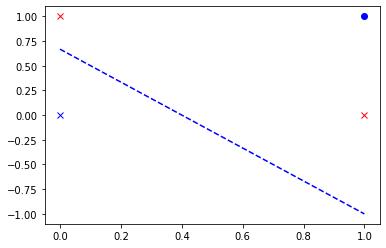

In [156]:
plotgraph(data,targets,finalweights)

**1.5** <u>Optional</u> extensions:

**1.5.1** Rerun your code for the "or" function.

**1.5.2** Modify your code to allow for the majority class function for three inputs (i.e. 1 if 2 or more inputs are on).

**1.5.3** Investigate what happens if you run the "xor" function through the training.

(Note: These are optional components offered if you wish to continue to explore this subject. No bonus points will be given for their completion.)


---
---

# **Part 2: Vowel Classification (20 pts)**

In this section, you will look at some actual (noisy) vowel formant data.

Formants, as we use them here, are the local maxima, or broad peaks, in a sound's spectrogram. They are related to the harmonic structure of sounds and so we expect them to be highly related to speech. So we will attempt to use formant pairs (the two highest/most powerful, peaks) to predict vowels.

Go to the International Phonetic Alphabet (IPA) vowel chart at https://en.wikipedia.org/wiki/IPA_vowel_chart_with_audio and play the sounds.  The chart is written in IPA, but here are the two letter (ARPABET) symbols for some of the vowels of English: iy, ih, ey, eh, ah, ao, ow, uw, ax.

Vowels are produced by shaping the vocal tract so some of their features are:

|Vowel|Tongue Height|Tongue Depth|Lip Shape|
|---|---|---|---|
|iy|close|front|unrounded|
|ih|near-close|front|unrounded|
|ey|close-mid|front|unrounded|
|eh|open-mid|front|unrounded|
|ah|open|back|rounded|
|ao|open-mid|back|rounded|
|ow|close-mid|back|rounded|
|uw|close|back|rounded|
|ax|mid|central|unrounded|

I've prepared a csv datafile with the following features:
* Vowels
 * 'vowel': Two-letter vowel identifier (e.g., 'iy', 'ih', etc.)
* Formants
 * 'f1': Strongest formant (in Hz)
 * 'f2': Second strongest formant (in Hz)
* Tongue Height
 * 'h1': close
 * 'h2': near-close or higher
 * 'h3': close-mid or higher
 * 'h4': mid or higher
 * 'h5': open-mid or higher
 * All are boolean (0,1)
 * **Note:** The above are inclusive of more open states. For example, 'ey' being 'close-mid' would have h2,h3 true and h1,h4,h5 false. This means you would need to combine (logical and,negation) multiple of the above features to determine a specific Tongue Height condition.
* Tongue Depth
 * 'b1': back
 * 'b2': central or back
 * Also boolean
 * **Note:** You can see 'front' is missing and 'central' in combined with 'back'. Similar to above, you would need to combine the above features together to get specific Tongue Depth values. (For example, for 'central' you would need to have b2 be true but b1 be false.
* Lip Shape
 * r: rounded
 * Again boolean, negate for 'unrounded'

---

First, let's read in the data.



In [ ]:
# first, read in the data and build a scatterplot showing the vowel formants
import pandas as pd
url='https://raw.githubusercontent.com/efosler/cse5522data/master/vowelfmts.csv'
df=pd.read_csv(url)

# This function will plot the vowels as a scatterplot with different colors
# using the traditional F2 vs F1 inverted plot.  This puts high (close) vowels
# at the top of the plot and low vowels (open) at the bottom.  Front vowels
# are to the left; back vowels to the right.  Optionally can plot a boundary.

def plotvowels(df,weights=None):
  # this next bit converts the label into a colormap value between 0 and 1
  vowels=df['vowel'].unique()
  vmap={}
  for i in range(vowels.shape[0]):
    vmap[vowels[i]]=float(i)/float(vowels.shape[0]-1)
  df['color']=df['vowel'].map(vmap)
  # plot the scatterplot
  plt.figure(num=1,figsize=(6,6))
  plt.scatter(df['f2'],df['f1'],s=1,c=df['color'],cmap='gist_rainbow')
  plt.xlabel('f2')
  plt.ylabel('f1')
  plt.gca().set_ylim([100,1000])
  plt.gca().set_xlim([750,2500])
  plt.gca().invert_xaxis()
  plt.gca().invert_yaxis()
  if weights is not None:
    dmin=df['f2'].min()
    dmax=df['f2'].max()
    plt.plot(np.array([dmin,dmax]),
             np.array([-(dmin*weights[0]+weights[2])/(weights[1]),
                       -(dmax*weights[0]+weights[2])/(weights[1])]),
             'b--'
             )

# Plot the vowel data.  Compare against the IPA chart online.      
plotvowels(df)

The chart above shows examples of vowels (iy, ih, ...) as colors, along with the formants (f1,f2) we will use to predict them.

You will notice that the vowel classes aren't linearly separable.  The idea in this section will be to try to separate vowels by different types of vocal tract features (back/front/close/open), and use perceptrons to predict those features (h1-h5,b1,b2,r).

**2.2** A bit of code to create training/test sets.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(df[['f1','f2']],df[['close','near-close+','close-mid+','mid+','open-mid+','back','central-or-back','rounded','vowel']])

**2.3** At this point, the project becomes a bit open-ended and exploratory.  What you should do is normalize F1 and F2 (perhaps it would be best to do that before the data splits, but that is your choice).  The main reason is that the bias term needs to be pretty high.

Then try to predict each of the vocal tract features as targets (e.g. train_targets['central-or-back']) from the f2/f1 data.  See if you can get reasonable classifiers for the 8 vocal tract features (h1-h5,b1,b2,r). What is your accuracy for each?

WARNING: The above will not be linearly separable, you will need to be careful about convergence.  See if you can figure out a reasonable place to stop training.



In [ ]:
# normalize training data
# (Use your Part 1 to) predict one of the attributes from training data
# repeat for all attributes

**2.4** Once you have classifiers see if you can predict the vowel category (iy, ih, etc.) based on the their output. (Remember, this means combining the output of the classifiers together to detect the proper Tongue Height, Tongue Depth and Lip Shape for each vowel.)  

In [ ]:
#Take the classifiers and try to predict vowel class ("and" function)!

---
---

# **Part 3: PyTorch Neural Networks** (0 pts)

This is a quick runthrough of PyTorch, and how to build a neural network.  The code below is a modified version of https://courses.cs.washington.edu/courses/cse446/18wi/sections/section8/XOR-Pytorch.html with some additional annotations to help you along.

This part is read-and-run (hence why it is worth no points), but pay close attention as you will be using/modifying what you see here in Part 4.

**Note:** If you are using Google Colab, you may want to change your runtime type to GPU/TPU (Runtime->Change runtime type->Hardware accelerator) to speed up computation with PyTorch.


**3.1** First some library preliminaries.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

**3.2** Now set up the data into *tensors* (i.e. multidimensional arrays).  X is the data array, Y is the target.

In [ ]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

**3.3** Let's define a multi-layer perceptron with 2 layers.  Each layer will create a linear combination of the inputs, and feed to a sigmoid output.

Note that the initializer (with the calls to nn.Linear) will create a set of parameters that are associated with the model.

In [ ]:
class MLP2(nn.Module):
    def __init__(self, input_dim = 2, hid_dim=2, output_dim=1):
        # initialze the superclass
        super(MLP2, self).__init__()
        # this will create a linear layer with input_dim x hid_dim parameters
        # in addition to a bias unit with hid_dim parameters
        self.lin1 = nn.Linear(input_dim, hid_dim)
        # same thing here except hid_dim x output_dim
        self.lin2 = nn.Linear(hid_dim, output_dim)
    
    # this is where the meat of the action is
    def forward(self, x):
        x = self.lin1(x)  # linear combination of inputs
        x = torch.sigmoid(x) # then through sigmoid - output of first layer
        x = self.lin2(x) # linear combination of hidden units
        x = torch.sigmoid(x) # then through sigmoid - net output
        return x

**3.4** We also define a function to initialize weights of our model.

In [ ]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)


**3.5** Now create a model and initialize it.  Also define a loss function and the optimizer.

In [ ]:
model = MLP2()
weights_init(model)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


**3.6** Now we run the training.

In [ ]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
     
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))


**3.7** This is a neat little bit of code that will print out the first layer's decision boundaries.

In [ ]:
model_params = list(model.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()

**3.8** Now take a look at the parameters that were learned.  Can you trace how the xor decision works for each of the datapoints?  

The first tensor is the input-hidden weights, second is the bias-hidden weights, third is hidden-output, and last is bias-output.

In [ ]:
model_params

---
---

# **Part 4: MLP classification of vowels (60 pts)**

In this section we will combine together what you learned in Parts 2 and 3.

Previously, in Part 2 we noted the vowel data was not linearly separable based solely on the formants, hence could not be solved with a single-layer percepton.

We then proceeded to manually separate the data based on vocal tract features, then manually recombine the results to get vowel predictions.

In this Part 4 we will take a different approach: We will instead use a *multi-layer perceptron* which should be capable of solving even non-linearly separable problems.

This should allow us to predict vowel classes directly from formants, ignoring the vocal tract features completely.

---

**4.1** With the formant data from Part 2, use PyTorch to construct a 2-layer MLP with 100 hidden units, predicting the vowel class.

Note: The traditional way to do this is to have a softmax output with a cross entropy loss.  Pytorch does this using the [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/master/generated/torch.nn.CrossEntropyLoss.html) function, which expects as its input the linear layer (it builds the softmax function into the loss).

You will need to convert vowel labels (iy, ih, etc.) to integer indices for output units.
 
Report and discuss results on the test set.

**Note:** Part of this task involves adapting what you learned in Part 3, as well as looking up documentation/examples for PyTorch to make the required modifications.

In [ ]:
# Your MLP code here

**4.2** You may be disappointed in the accuracy you achieve in the previous step. But it turns out that multi-class classification has results that are a bit tricky to interpret (compared to binary classification).

Let's turn your results into binary classification and re-evaluate.

Instead of considering all vowel classes at once, let's take one, say 'ih'. Convert your previous predictions to binary by saying they are true when 'ih' is the most likely prediction and false if any other vowel class is more likely.

Recalculate the accuracy based on this. Are the results more to your liking?

Repeat the above for each vowel class.

Can you explain why the results seem better when they are put in this form?

**4.3** Develop an experiment with 2 (new) different variations of the model (e.g., different widths, numbers of layers, activation functions, etc).   Create a short writeup explaining (1) why you chose the variations, and (2) how it affected performance on the test set.